## 建立模型四步驟

在 Scikit-learn 中，建立一個機器學習的模型其實非常簡單，流程大略是以下四個步驟

1. 讀進資料，並檢查資料的 shape (有多少 samples (rows), 多少 features (columns)，label 的型態是什麼？)
    - 讀取資料的方法：
        - **使用 pandas 讀取 .csv 檔：**pd.read_csv
        - **使用 numpy 讀取 .txt 檔：**np.loadtxt 
        - **使用 Scikit-learn 內建的資料集：**sklearn.datasets.load_xxx
    - **檢查資料數量：**data.shape (data should be np.array or dataframe)
2. 將資料切為訓練 (train) / 測試 (test)
    - train_test_split(data)
3. 建立模型，將資料 fit 進模型開始訓練
    - clf = DecisionTreeClassifier()
    - clf.fit(x_train, y_train)
4. 將測試資料 (features) 放進訓練好的模型中，得到 prediction，與測試資料的 label (y_test) 做評估
    - clf.predict(x_test)
    - accuracy_score(y_test, y_pred)
    - f1_score(y_test, y_pred)

## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics
import matplotlib.pyplot as plt
import numpy as np

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import linear_model
from sklearn.model_selection import train_test_split

%matplotlib inline 

### 1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？

In [2]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型

# clf = DecisionTreeClassifier() #default  (criterion="gini")
# clf = DecisionTreeClassifier(criterion="entropy") #criterion="entropy"
clf = DecisionTreeClassifier(criterion="gini", splitter="random") # splitter="random

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print(iris.feature_names)
print("Feature importance: ", clf.feature_importances_)

Acuuracy:  0.9736842105263158
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.03233879 0.02358037 0.49642284 0.447658  ]


### 2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

### wine 酒類分類
**1. Logistic Regression**

In [3]:
# 讀取 wine 酒類分類資料集
wine = datasets.load_wine()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)

# 建立模型
logreg = linear_model.LogisticRegression(solver='newton-cg')

# 訓練模型
logreg.fit(x_train, y_train)

# 預測測試集
y_pred = logreg.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

c:\users\raoblack\documents\100ai\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy:  0.9777777777777777


### wine 酒類分類
**2. DecisionTreeClassifier**

In [4]:
# 讀取 wine 酒類分類資料集
wine = datasets.load_wine()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier(criterion="entropy") #criterion="entropy"

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print("Feature importance: ", clf.feature_importances_)

Acuuracy:  0.9777777777777777
Feature importance:  [0.         0.01571782 0.         0.01794699 0.         0.
 0.41359716 0.         0.         0.2188998  0.         0.
 0.33383822]


### boston 房價預測
**1. linear regression**

In [5]:
# 讀取boston房價預測資料集
boston = datasets.load_boston()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state=4)

# 建立模型
regr = linear_model.LinearRegression()

# 訓練模型
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % metrics.mean_squared_error(y_test, y_pred))

Mean squared error: 26.95


### boston 房價預測
**2. DecisionTree Regression**

In [6]:
# 讀取boston房價預測資料集
boston = datasets.load_boston()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state=4)

# 建立模型
rlf = DecisionTreeRegressor()

# 訓練模型
rlf.fit(x_train, y_train)

# 預測測試集
y_pred = rlf.predict(x_test)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % metrics.mean_squared_error(y_test, y_pred))

Mean squared error: 25.56


### boston 房價預測 (2D 可視化)

In [7]:
# 讀取boston房價預測資料集
boston = datasets.load_boston()

data_1d = boston.data[:, [6]]#為了方便繪圖，只選擇其中一個 feature

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(data_1d, boston.target, test_size=0.25, random_state=4)

**1. linear regression**

Mean squared error of ordinary least square: 89.48


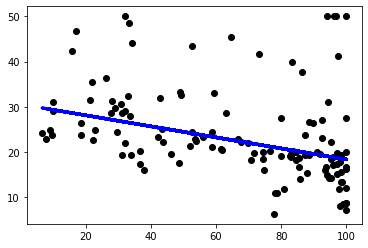

In [8]:
# 建立 Ordinary Least Square Regressor
regr = linear_model.LinearRegression()

# 訓練模型
regr.fit(x_train, y_train)

# 預測測試集
y_pred_linear = regr.predict(x_test)

print("Mean squared error of ordinary least square: %.2f"
      % metrics.mean_squared_error(y_test, y_pred_linear))

# 畫出回歸模型與實際資料的分佈
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred_linear, color='blue', linewidth=3, label='Linear Regression')
plt.show()

**2. DecisionTree Regression**

[[100. ]
 [ 22.9]
 [ 36.8]
 [ 88.6]
 [ 86.5]
 [  6.6]
 [ 21.9]
 [ 84. ]
 [100. ]
 [ 96. ]
 [ 28.1]
 [ 58.7]
 [ 37.8]
 [ 92.6]
 [ 58.8]
 [ 94.1]
 [ 82.9]
 [ 77.8]
 [100. ]
 [ 85.7]
 [100. ]
 [ 98.5]
 [ 95.8]
 [ 97.1]
 [ 48.5]
 [ 87.4]
 [100. ]
 [ 94.7]
 [ 74.8]
 [ 91.9]
 [ 78.1]
 [ 32. ]
 [ 94.5]
 [ 69.7]
 [ 97. ]
 [ 98.8]
 [ 63.1]
 [ 17. ]
 [ 67.8]
 [  7.8]
 [ 15.7]
 [ 97.4]
 [100. ]
 [  9.9]
 [ 88.5]
 [ 31.1]
 [ 32. ]
 [ 85.5]
 [ 83. ]
 [ 52.5]
 [ 27.9]
 [ 95.2]
 [100. ]
 [ 31.1]
 [ 98.4]
 [ 82.6]
 [ 79.9]
 [ 42.8]
 [ 36.6]
 [ 32.9]
 [ 95.4]
 [ 91.1]
 [ 29.1]
 [ 83.5]
 [ 52.6]
 [ 29.7]
 [ 96.8]
 [100. ]
 [ 79.8]
 [ 51.9]
 [ 22.3]
 [ 66.6]
 [ 43.4]
 [ 42.2]
 [ 97. ]
 [ 59.5]
 [ 97.9]
 [ 87.3]
 [ 78.7]
 [ 85.4]
 [ 33.8]
 [ 93.6]
 [ 33.5]
 [ 84.5]
 [ 32.1]
 [ 80.8]
 [ 49.3]
 [ 70.6]
 [ 53.8]
 [ 64.5]
 [ 21.4]
 [ 33.2]
 [ 71.7]
 [ 73.3]
 [ 43.7]
 [ 76.7]
 [ 61.5]
 [100. ]
 [ 97.8]
 [ 46.3]
 [100. ]
 [ 56. ]
 [ 26.3]
 [ 98.2]
 [  8.9]
 [ 61.8]
 [ 34.2]
 [ 10. ]
 [ 83.3]
 [ 53.6]
 [ 92.4]
 

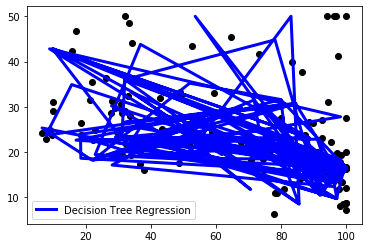

In [14]:
# 建立 Decision Tree Regressor
rlf = DecisionTreeRegressor()

# 訓練模型
rlf.fit(x_train, y_train)

#x_test 排序 (為了可視化，因為 Decision Tree Regressor 並不會產生一條直線)
#y_test 要按照 x_test 的大小次序排列
# Test_zip = zip(x_test.ravel(), y_test.ravel())
# Test_sorted = sorted(Test_zip)

# x_test_sorted, y_test_sorted = zip(*Test_sorted)

x_test_sorted = np.sort(x_test)

# x_test_sorted = np.array(x_test_sorted)
# y_test_sorted = np.array(y_test_sorted)

print(x_test_sorted)
# 預測測試集
y_pred_rlf = rlf.predict(x_test_sorted)

print("Mean squared error of Decision Tree Regression: %.2f"
      % metrics.mean_squared_error(y_test, y_pred_rlf))

# 畫出回歸模型與實際資料的分佈
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test_sorted, y_pred_rlf, color='blue', linewidth=3, label='Decision Tree Regression')
plt.legend()
plt.show()